In [1]:
import spinmob as s
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.optimize as opt
import os
import mcphysics as m
import seaborn as sns

user_path = '/Users/oliviapereira/Desktop' if (os.path.isdir('/Users/oliviapereira')) else '/Users/audrey/Documents/PHYS469'

# make plt plot inline
%matplotlib inline


  To disable warnings, set spinmob.settings['ignore_warnings']=True


In [17]:
folder_path = user_path + '/PHYS469/alpha_decay/raw_data/calibration_new'

# making an array of channel-voltage pais, where the channel is the file name and the voltage is the peak y value in each file 
# txt files, headers are on row 29

# get all the files in the folder
files = os.listdir(folder_path)

# sort the files by channel number
files.sort()
files.remove('channel_counts.Chn')

# initialize the array
pulser_voltages = []
pulser_channels = []

# loop through the files
for file in files:
    # read the file
    data = np.genfromtxt(folder_path + '/' + file, skip_header=29)
    # get the peak y value
    peak = max(data[:,1])
    # # get the channel number
    channel = int(file.split('.')[0])
    # # add the pair to the array
    pulser_voltages.append(peak)
    pulser_channels.append(channel)

voltage_err = 0.0001

In [12]:
folder_path = user_path + '/PHYS469/alpha_decay/raw_data/'

am_data = m.data.load_chn(folder_path + 'am_source.chn')
am_counts = am_data.columns['Counts']

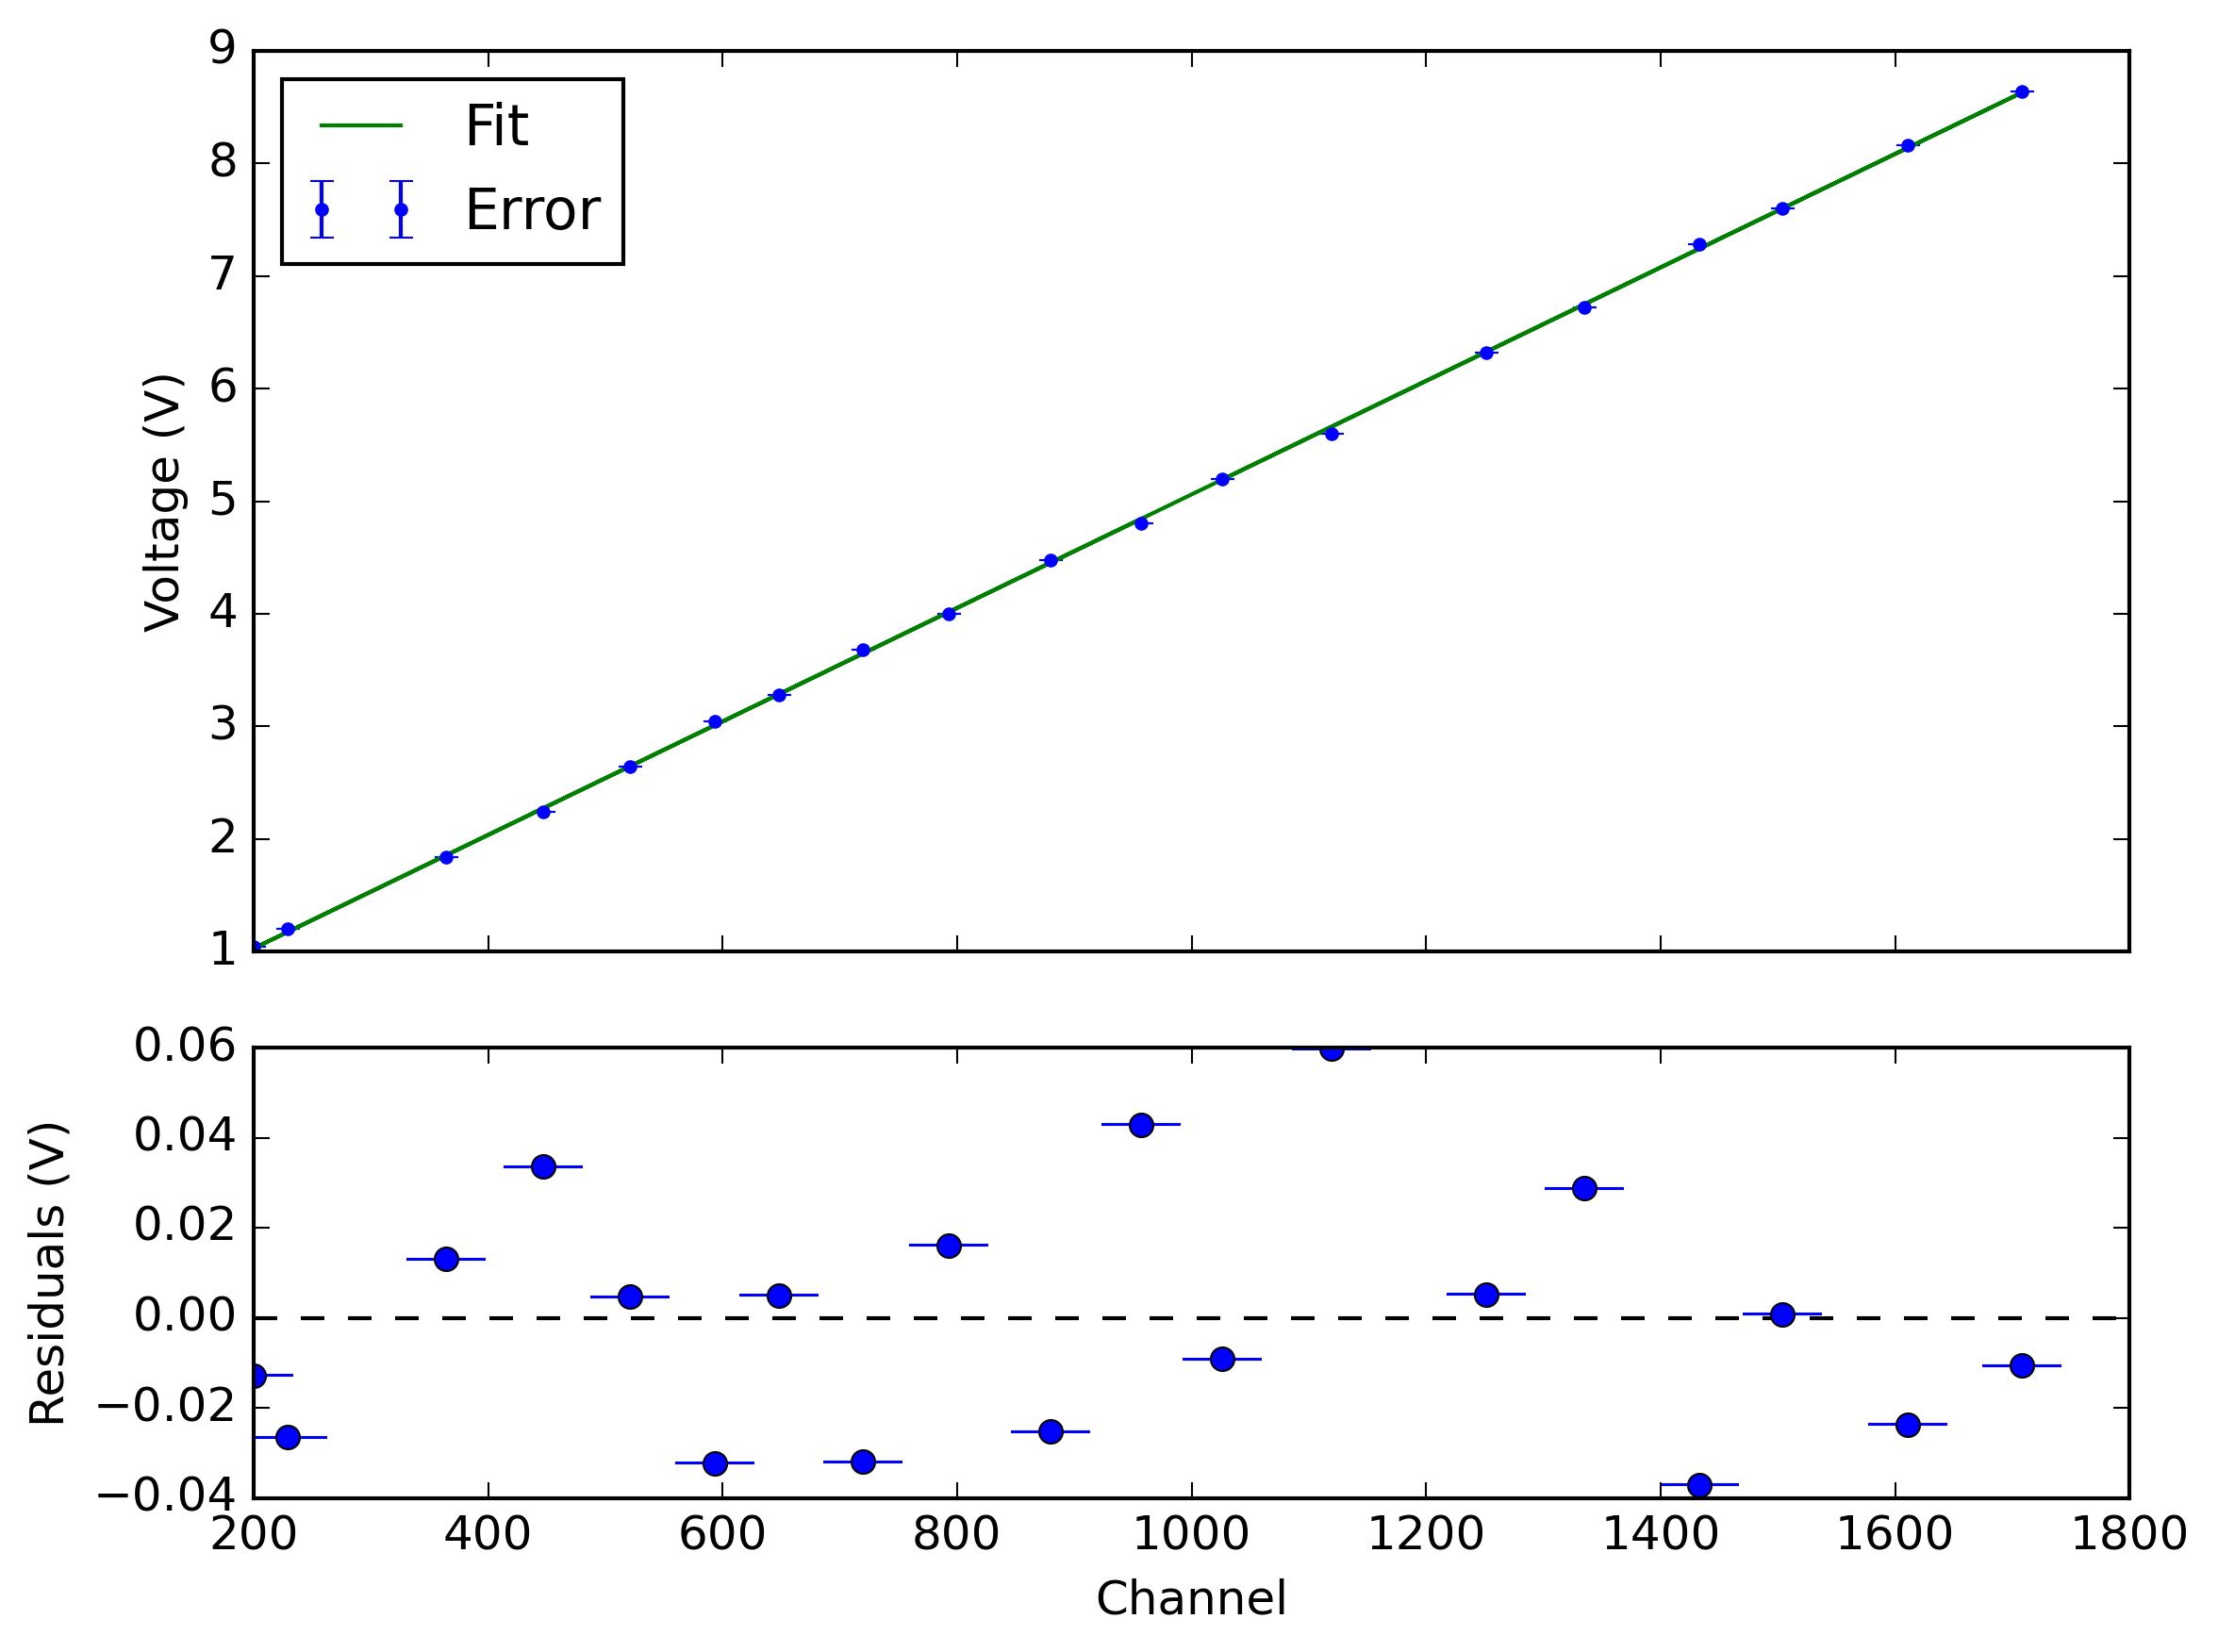

In [24]:
def line(channels, m, b):
    channels = np.array(channels)
    return m * channels + b

# using the Americium to get a known point: 
am_peak = np.where(am_counts == np.max(am_counts))[0][0]

#fit the calibration data
popt, pcov = opt.curve_fit(line, pulser_channels, pulser_voltages, p0=[1, 0])
m, b = popt

# plot the fit and residuals
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), dpi = 300, gridspec_kw={'height_ratios': [2, 1]})

# Main plot
ax1.errorbar(pulser_channels, pulser_voltages, yerr=voltage_err, fmt='.', label='Error')
ax1.plot(pulser_channels, line(pulser_channels, m, b), label='Fit')
ax1.set_ylabel('Voltage (V)')
ax1.legend(loc = 'upper left')

# Residuals plot
ax2.errorbar(pulser_channels, line(pulser_channels, m, b) - pulser_voltages, yerr=voltage_err, fmt='o', capsize = 10)
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlabel('Channel')
ax2.set_ylabel('Residuals (V)')

plt.tight_layout()
# plt.savefig(user_path + '/PHYS469/alpha_decay/figures/calibration.pdf', bbox_inches='tight')
plt.show()